# [Week6] Social Network Example2_politicians

##### 2020710058 Applied Data Science Doo-yeonog, Lee

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from collections import Counter
%matplotlib inline

In [5]:
df=pd.read_csv("DonaldTrump.csv", encoding = "ISO-8859-1")
df.head()

,Person A,Person B,Connection,Source(s)
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...
1,ALLEN WEISSELBERG,JACK WEISSELBERG,Parent/child,https://www.nytimes.com/2016/05/24/business/de...
2,ANAR MAMMADOV,ZIYA MAMMADOV,Parent/child,https://www.meydan.tv/en/site/politics/13787/
3,ANDREW BREMBERG,MIKE FERGUSON,"Bremberg ""is a lifelong friend"" of Ferguson, a...",https://www.statnews.com/2016/11/15/trump-infl...
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...


### Counts of Nodes : More than 1

In [6]:
ppl_li = df['Person A'].tolist() + df['Person B'].tolist()
cnt_dic= dict(Counter(ppl_li))
cnt_dic

{'ALEXANDER NIX': 2,
 'ALLEN WEISSELBERG': 1,
 'ANAR MAMMADOV': 1,
 'ANDREW BREMBERG': 4,
 'ANDY PUZDER': 2,
 'ANTHONY SCARAMUCCI': 2,
 'AVRAM LEBOR': 1,
 'BEN CARSON': 2,
 'BILL STEPIEN': 3,
 'CARTER PAGE': 1,
 'CHARLES KUSHNER': 8,
 'CHLOE MURDOCH': 3,
 'CHRIS CHRISTIE': 2,
 'DANIEL RIDLOFF': 1,
 'DAVID S. CORDISH': 2,
 'DONALD J. TRUMP': 117,
 'DONALD TRUMP JR.': 9,
 'ELAINE CHAO': 5,
 'ELVIRA KUDRYASHOVA': 3,
 'ERIC TRUMP': 2,
 'ERIK PRINCE': 2,
 'FELIX SATER': 1,
 'GEORGE SOROS': 1,
 'GEORGE T. CONWAY III': 1,
 'GRACE MURDOCH': 3,
 'ILYAS KHRAPUNOV': 1,
 'IVANKA TRUMP': 11,
 'JAMES S.C. CHAO': 3,
 'JARED KUSHNER': 17,
 'JEFF SESSIONS': 6,
 'JOSE E.B. ANTONIO': 1,
 'JOSEPH MEYER': 1,
 'JOSHUA KUSHNER': 3,
 'LEV LEVIEV': 1,
 'LUCIUS JOSEPH RICCIO': 1,
 'MARK BURNETT': 1,
 'MARYANNE TRUMP BARRY': 2,
 'MATTHEW CALAMARI': 1,
 'MEHMET ALI YALCINDAG': 3,
 'MELANIA TRUMP': 3,
 'MICHAEL FASCITELLI': 1,
 'MICHELLE BACHMANN': 1,
 'MICK MULVANEY': 2,
 'MIKE PENCE': 6,
 'MITCH MCCONNELL': 2,
 

In [7]:
new_df = pd.DataFrame({'Person' : list(cnt_dic.keys()), 'Count' : list(cnt_dic.values())})
new_df

,Person,Count
0,ALEXANDER NIX,2
1,ALLEN WEISSELBERG,1
2,ANAR MAMMADOV,1
3,ANDREW BREMBERG,4
4,ANDY PUZDER,2
...,...,...
227,EDWARD LAMPERT,1
228,XI JINPING,1
229,TONY TIAH THEE KIAN,1
230,CATHERINE BRAY GRIFFITH,1


### Remove Nodes having less than 1 of counts

In [19]:
overone = new_df[new_df['Count']>1]
overone.Count.sort_values()

0        2
58       2
59       2
60       2
213      2
      ... 
48       8
16       9
26      11
28      17
15     117
Name: Count, Length: 81, dtype: int64

In [20]:
oo = overone.Person.unique()
data = df[df['Person A'].isin(oo)&df['Person B'].isin(oo)]
data

,Person A,Person B,Connection,Source(s)
0,ALEXANDER NIX,BRAD PARSCALE,"Pascale says he hired Nix's company, Cambridge...",https://www.washingtonpost.com/politics/trumps...
4,ANDREW BREMBERG,MITCH MCCONNELL,Policy advisor and counsel on nominations,https://www.linkedin.com/in/andrew-bremberg-71...
9,BEN CARSON,BARRY BENNETT,Bennet was Carson's presidential campaign manager,https://www.washingtonpost.com/news/post-polit...
10,BILL STEPIEN,KEVIN MARINO,Marino served as Stepien's attorney during the...,http://www.politico.com/story/2017/01/bill-ste...
13,CHARLES KUSHNER,DARA ORBACH,Parent/child,http://www.townandcountrymag.com/society/polit...
...,...,...,...,...
257,VLADIMIR PUTIN,IGOR SECHIN,Former deputy prime minister,https://www.ft.com/content/a8f24922-cef4-11e3-...
259,WENDI DENG MURDOCH,CHLOE MURDOCH,Parent/child,https://www.ft.com/content/a615f0ce-ed90-11e6-...
260,WENDI DENG MURDOCH,GRACE MURDOCH,Parent/child,https://www.ft.com/content/a615f0ce-ed90-11e6-...
261,WENDI DENG MURDOCH,IVANKA TRUMP,"""Close friend,"" according to the Guardian",https://www.theguardian.com/film/2016/oct/11/w...


### Network

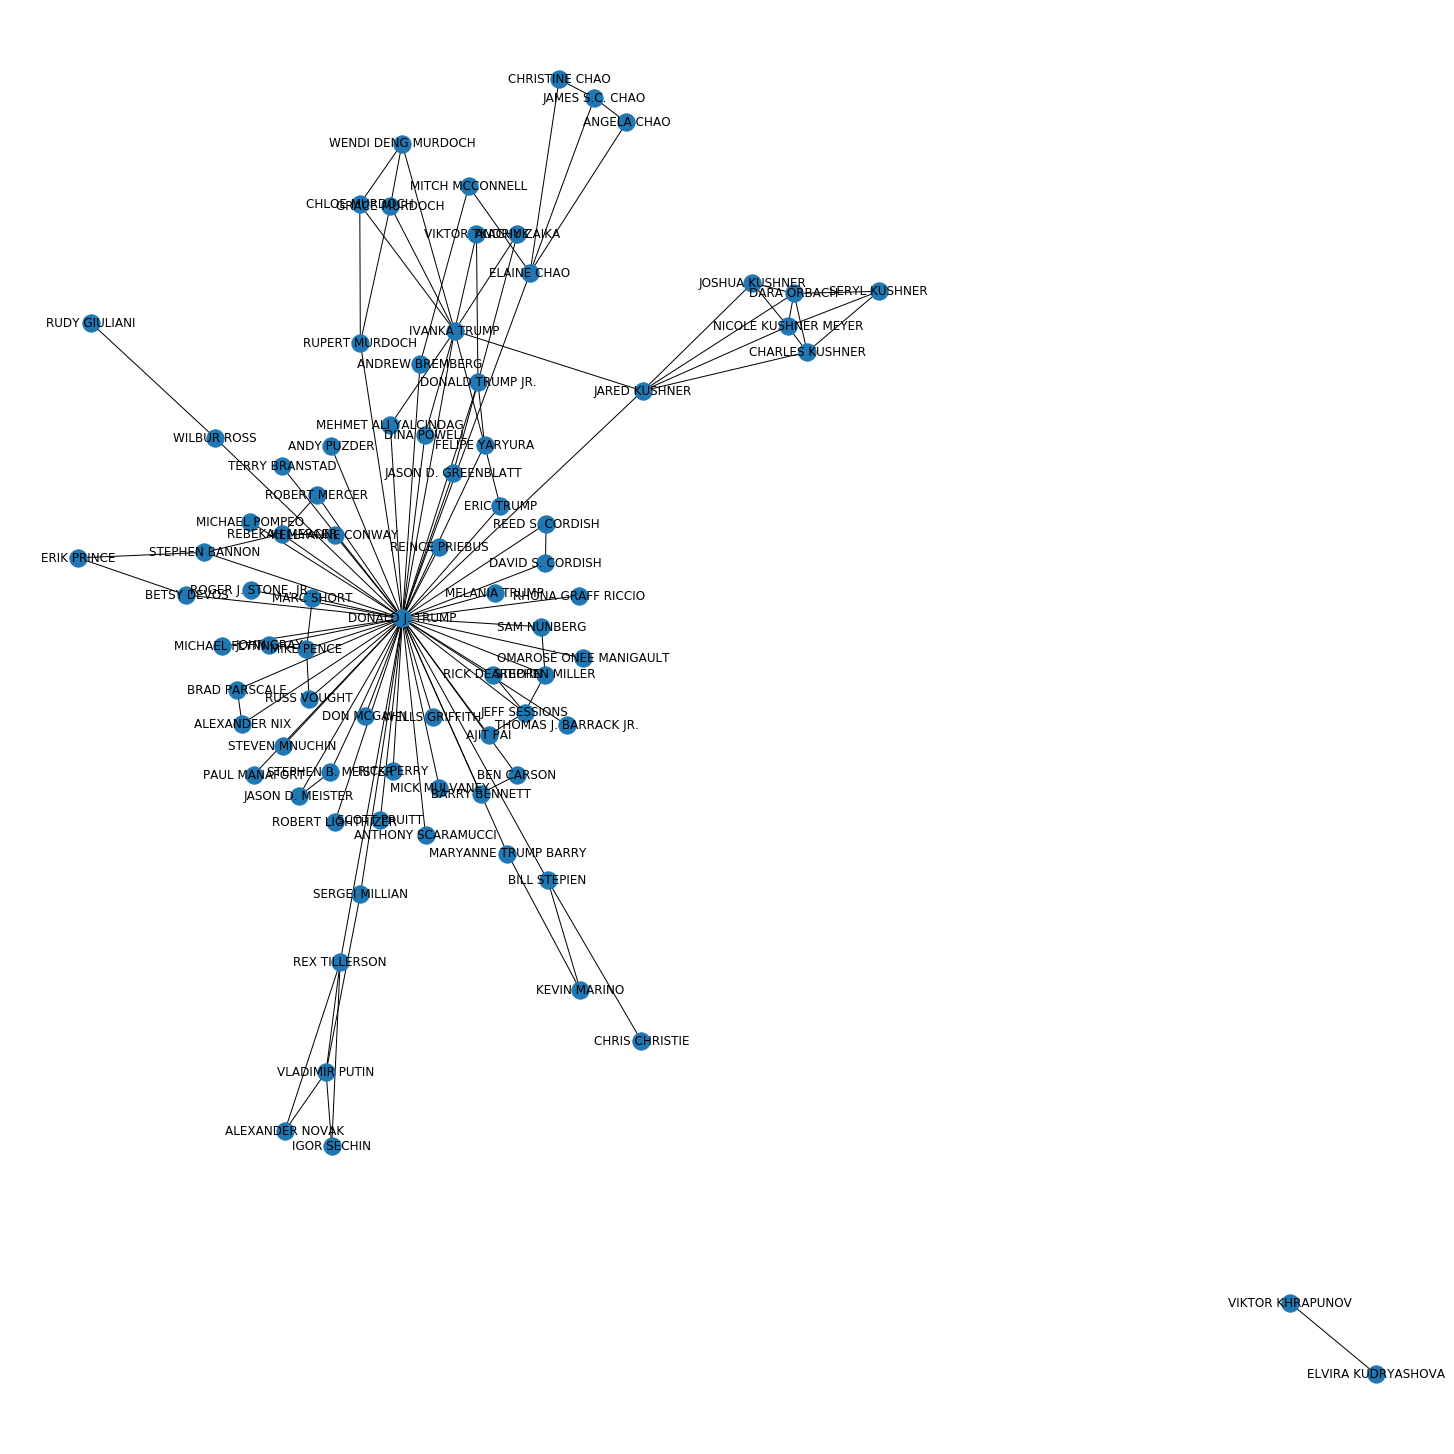

In [21]:
edges=list(zip(data['Person A'], data['Person B']))
G1 = nx.Graph()
G1.add_nodes_from(oo)
G1.add_edges_from(edges)
plt.figure(figsize=(20,20)) 
nx.draw(G1, with_labels=True)
plt.show()

In [22]:
def show_plot(title, y, width):
    plt.figure(figsize=(20, 12))
    plt.title(title)
    plt.barh(y = y, width = width, color = 'b')
    plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=6, width=2)
    plt.show()

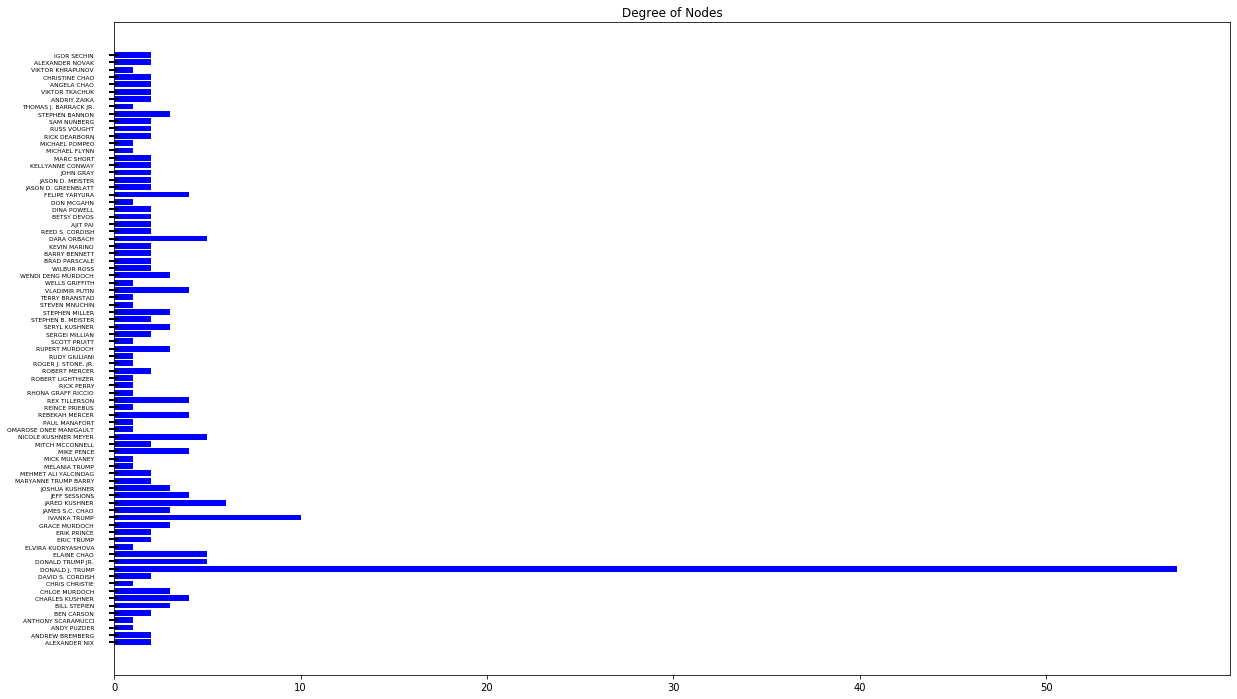

In [23]:
show_plot('Degree of Nodes', 
          y = [k for k in dict(G1.degree()).keys()],
         width = [v for v in dict(G1.degree()).values()])

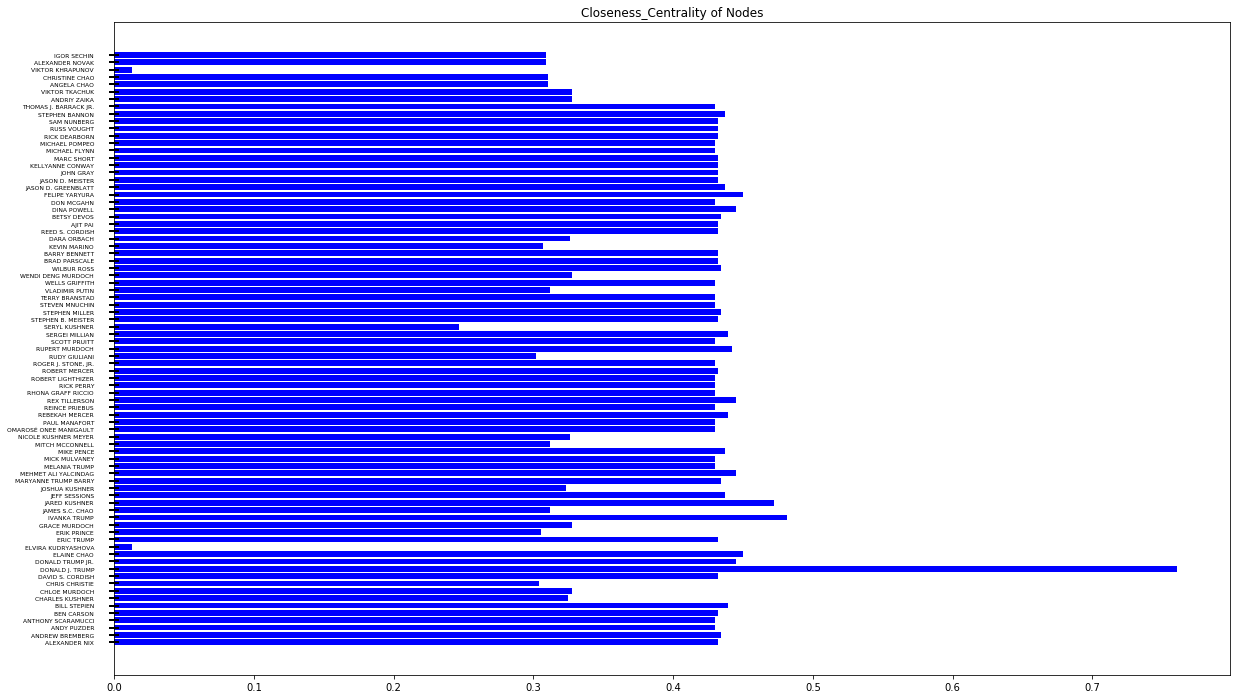

In [24]:
close_centrality = nx.closeness_centrality(G1) 
show_plot('Closeness_Centrality of Nodes', 
          y = [k for k in dict(close_centrality).keys()],
         width = [v for v in dict(close_centrality).values()])

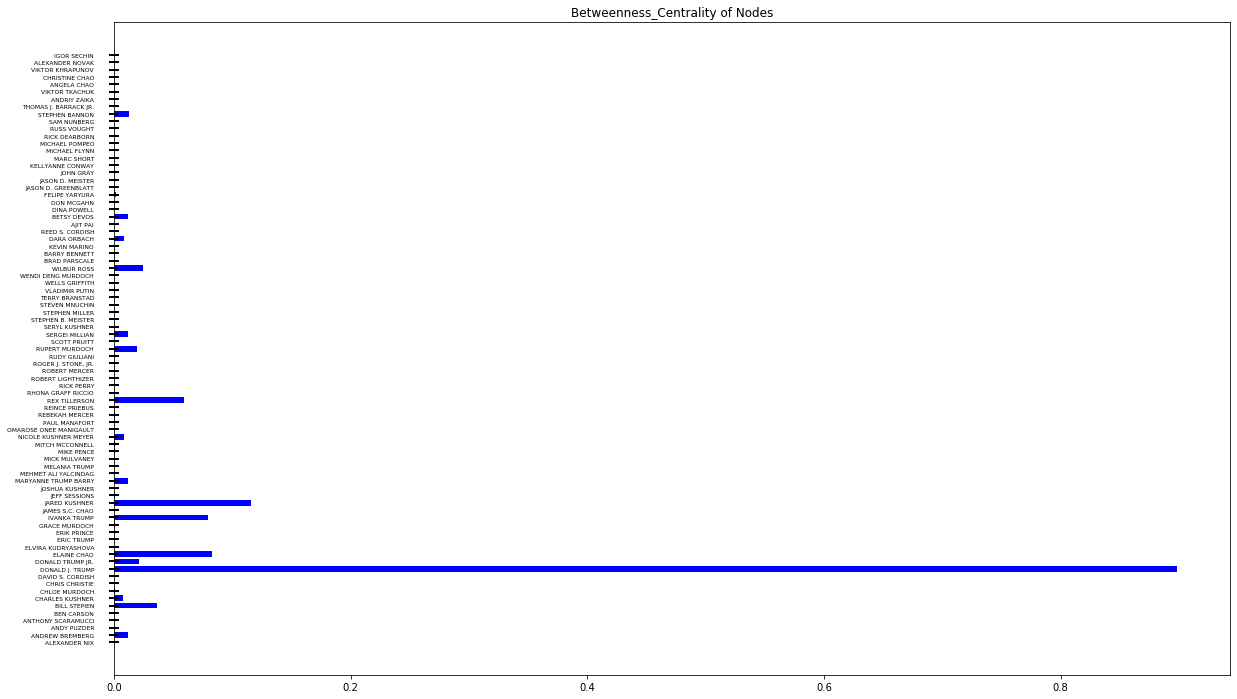

In [25]:
bet_centrality = nx.betweenness_centrality(G1, normalized = True, endpoints = False)
show_plot('Betweenness_Centrality of Nodes', 
          y = [k for k in dict(bet_centrality).keys()],
         width = [v for v in dict(bet_centrality).values()])